<a href="https://colab.research.google.com/github/0123universe/0123universe/blob/main/Glass%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
train a random forest classifier on this dataset

Here is all the data you need:
"glass.csv"

## Data loading

### Subtask:
Load the "glass.csv" dataset into a pandas DataFrame.


**Reasoning**:
Load the "glass.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('glass.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'glass.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


(214, 10)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining data types, missing values, descriptive statistics, target variable distribution, and correlations.



Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Descriptive Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max     

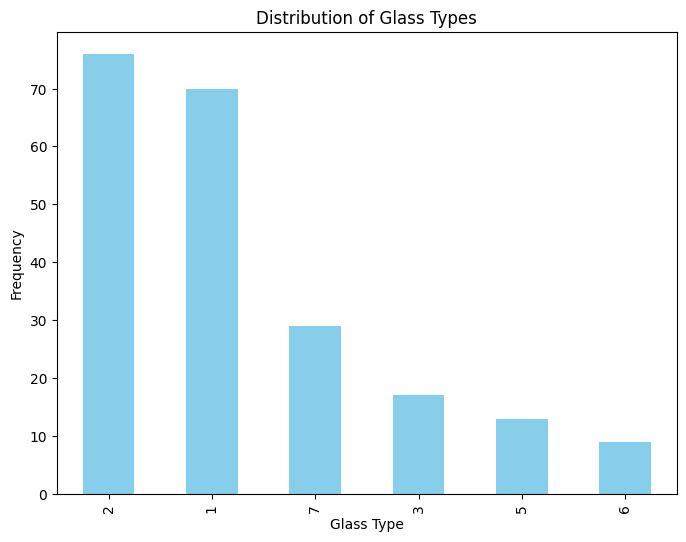

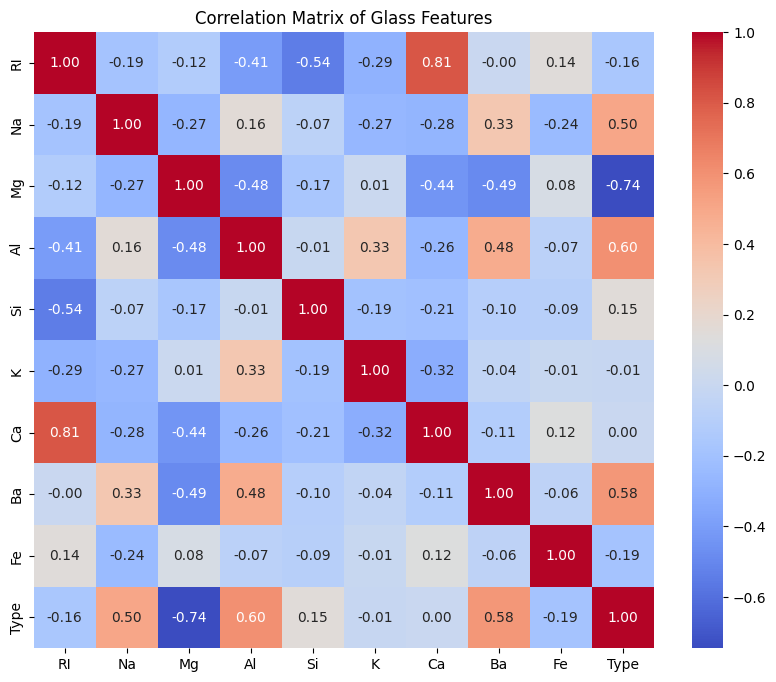

In [2]:
# Data Types and Missing Values
print("Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Target Variable Distribution
print("\nTarget Variable Distribution:\n", df['Type'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Glass Features')
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by handling missing values (if any), scaling numerical features, and potentially converting categorical features.


**Reasoning**:
Scale numerical features and convert the target variable to categorical.



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Convert the target variable to categorical
y = y.astype('category')

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a RandomForestClassifier on the prepared training data.


**Reasoning**:
Train a RandomForestClassifier on the prepared training data (X_train, y_train).



In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestClassifier model using appropriate metrics.


**Reasoning**:
Predict the target variable for the test set using the trained model and evaluate the model using various metrics and visualize the confusion matrix.



Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-score: 0.8330452594474481


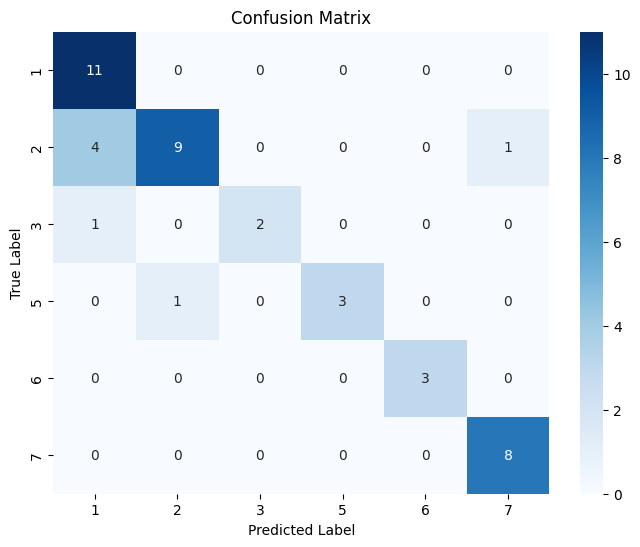

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the target variable for the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=y_test.cat.categories, yticklabels=y_test.cat.categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model optimization

### Subtask:
Optimize the hyperparameters of the RandomForestClassifier model.


**Reasoning**:
Optimize the hyperparameters of the RandomForestClassifier model using RandomizedSearchCV.



In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1, # Use all available cores
    verbose=1,  # Print progress updates
    random_state=42
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Extract the best hyperparameters and best estimator
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': 450, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}


## Model evaluation

### Subtask:
Evaluate the optimized RandomForestClassifier model.


**Reasoning**:
Evaluate the optimized RandomForestClassifier model using the test set and calculate the evaluation metrics. Generate and display the confusion matrix.



Accuracy: 0.8604651162790697
Precision: 0.8816935002981515
Recall: 0.8604651162790697
F1-score: 0.8553899158550323


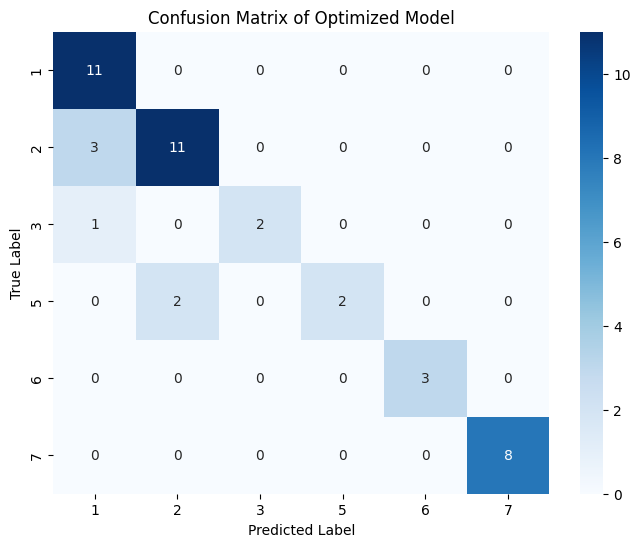

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the target variable for the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=y_test.cat.categories, yticklabels=y_test.cat.categories)
plt.title("Confusion Matrix of Optimized Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Summary:

### 1. Q&A

The task was to train a RandomForestClassifier on the "glass.csv" dataset and evaluate its performance.  The analysis included data loading, exploration, preparation, model training, hyperparameter optimization, and final model evaluation.

The optimized model achieved an accuracy of 0.86, precision of 0.88, recall of 0.86, and an F1-score of 0.86 on the test set.

### 2. Data Analysis Key Findings

* **Target Variable Imbalance:** The 'Type' column (target variable) exhibits an imbalance in class distribution, with Type 2 having the highest frequency (76 instances).
* **Feature Correlation:** A correlation analysis revealed the linear relationships between the numerical features.  The heatmap visualization aided in understanding these relationships.
* **Hyperparameter Optimization:** RandomizedSearchCV identified the best hyperparameters for the RandomForestClassifier: `{'n_estimators': 450, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}`.
* **Optimized Model Performance:** The optimized model achieved an accuracy of 0.86 on the test set, an improvement over the initial model. Precision, recall and F1 score also improved to 0.88, 0.86 and 0.86 respectively.

### 3. Insights or Next Steps

* **Investigate Class Imbalance:** Given the class imbalance in the target variable, explore techniques like oversampling, undersampling, or cost-sensitive learning to potentially improve model performance on the minority classes.  Analyze the confusion matrix in detail to identify specific misclassifications.
* **Explore Other Models:**  Experiment with other classification algorithms (e.g., Support Vector Machines, Gradient Boosting Machines) to see if they achieve better results on this dataset.  Compare the performance of these models against the optimized RandomForestClassifier.
